In [1]:
library(purrr)
library(dplyr)
library(corrplot)
library(hablar)
library(corrplot)
library(RColorBrewer)
library(MASS)
library(stats)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.84 loaded

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
train = read.csv("train.csv")
train['train_or_test'] = 'train'
test = read.csv("test.csv")
test['train_or_test'] = 'test'

In [3]:
train_target <- train[c('Id', 'SalePrice')]
train <- train[names(train) != 'SalePrice']
al <- rbind(train, test)

In [4]:
desc <- function (variable){
    if (is.numeric(al[[variable]])){
            hist(al[[variable]], xlab = "", main = paste("Histogram of ", toupper(variable)))
    }
    
    else if (is.character(al[[variable]]) | is.factor(al[[variable]])){
            barplot(prop.table(table(al[[variable]])), main = paste("Barplot of ", toupper(variable)))    
        }
    }

In [5]:
# data.frame(colSums(is.na(al)))
NAs <- al %>%
    map_df(function(x) sum(is.na(x))) %>%
    gather(feature, num_nulls)  %>% 
    mutate(Na_ratio = round(num_nulls / nrow(al), 4))
NAs <- NAs[NAs$num_nulls != 0,]          
(NAs <- NAs[order(NAs$num_nulls, decreasing = T), ])

feature,num_nulls,Na_ratio
PoolQC,2909,0.9966
MiscFeature,2814,0.9640
Alley,2721,0.9322
Fence,2348,0.8044
FireplaceQu,1420,0.4865
LotFrontage,486,0.1665
GarageYrBlt,159,0.0545
GarageFinish,159,0.0545
GarageQual,159,0.0545
GarageCond,159,0.0545


In [6]:
# in variables desription file, we see that some Na has meaning, so we replace Na's by that value
al$Alley <- ifelse(is.na(al$Alley), "No alley access", al$Alley)
al$BsmtQual <- ifelse(is.na(al$BsmtQual), "No Basement", al$BsmtQual)
al$BsmtQual <- ifelse(is.na(al$BsmtQual), "No Basement", al$BsmtQual)
al$BsmtCond <- ifelse(is.na(al$BsmtCond), "No Basement", al$BsmtCond)
al$BsmtExposure <- ifelse(is.na(al$BsmtExposure), "No Basement", al$BsmtExposure)
al$BsmtFinType1 <- ifelse(is.na(al$BsmtFinType1), "No Basement", al$BsmtFinType1)
al$BsmtFinType2 <- ifelse(is.na(al$BsmtFinType2), "No Basement", al$BsmtFinType2)
al$FireplaceQu <- ifelse(is.na(al$FireplaceQu), "No Fireplace", al$FireplaceQu)
al$GarageType <- ifelse(is.na(al$GarageType), "No Garage", al$GarageType)
al$GarageQual <- ifelse(is.na(al$GarageQual), "No Garage", al$GarageQual)
al$GarageFinish <- ifelse(is.na(al$GarageFinish), "No Garage", al$GarageFinish)
al$GarageCond <- ifelse(is.na(al$GarageCond), "No Garage", al$GarageCond)
al$PoolQC <- ifelse(is.na(al$PoolQC), "No Pool", al$PoolQC)
al$Fence <- ifelse(is.na(al$Fence), "No Fence", al$Fence)
al$MiscFeature <- ifelse(is.na(al$MiscFeature), "None", al$MiscFeature)

In [7]:
# Now we check again NA's
NAs <- al %>%
    map_df(function(x) sum(is.na(x))) %>%
    gather(feature, num_nulls)  %>% 
    mutate(Na_ratio = round(num_nulls / nrow(al), 4))
NAs <- NAs[NAs$num_nulls != 0,]          
(NAs <- NAs[order(NAs$num_nulls, decreasing = T), ])

feature,num_nulls,Na_ratio
LotFrontage,486,0.1665
GarageYrBlt,159,0.0545
MasVnrType,24,0.0082
MasVnrArea,23,0.0079
MSZoning,4,0.0014
Utilities,2,0.0007
BsmtFullBath,2,0.0007
BsmtHalfBath,2,0.0007
Functional,2,0.0007
Exterior1st,1,0.0003


In [8]:
# Let us fill NA's, in nemarice variables with mean, and in catagorical variables with most frequent
for (variable in NAs$feature){
    if (is.numeric(al[[variable]])){
        al[variable][is.na(al[variable])] <- mean(al[[variable]], na.rm = TRUE)
    }
    else if (is.character(al[[variable]]) | is.factor(al[[variable]])){
        al[is.na(al[variable]),][variable] <- names(which.max(table(al[variable])))
    }
    }
    

In [9]:
# Now finally we check NA's
sum(is.na(al))

[1] 0

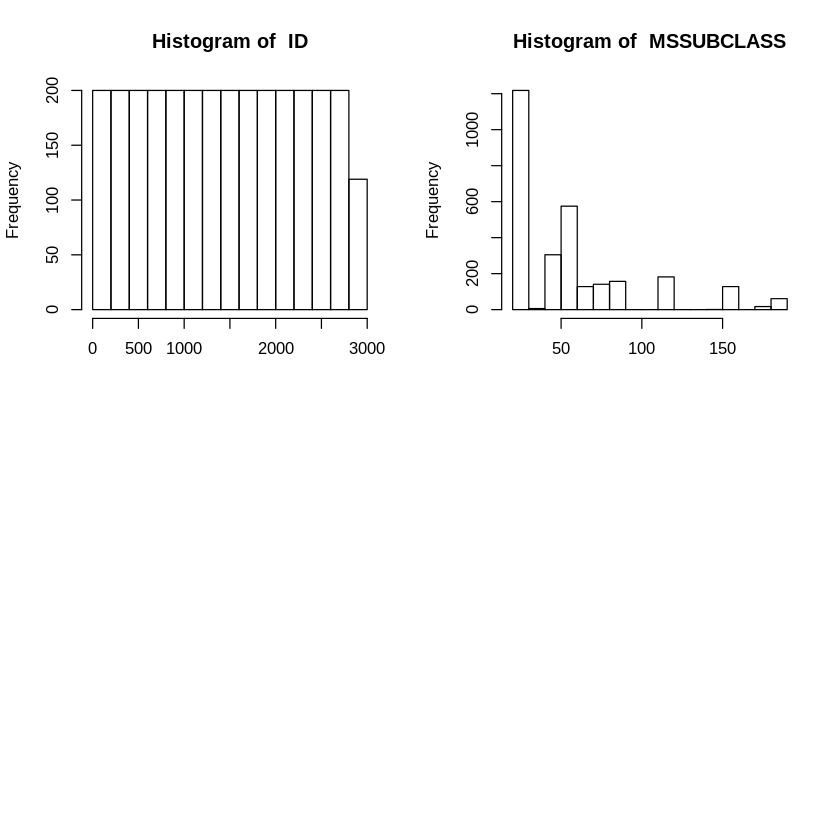

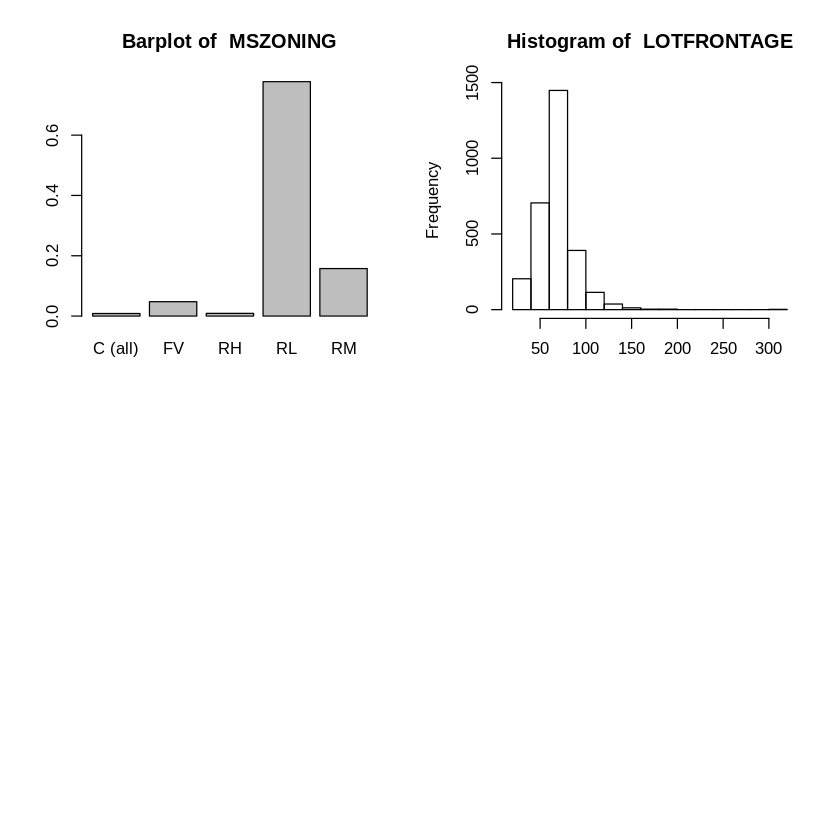

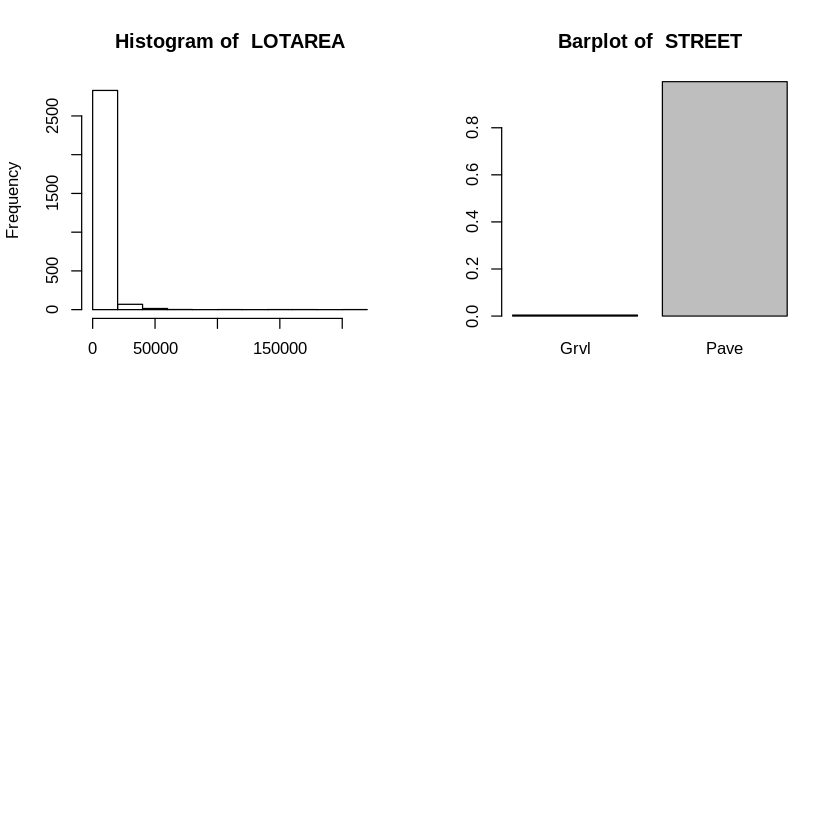

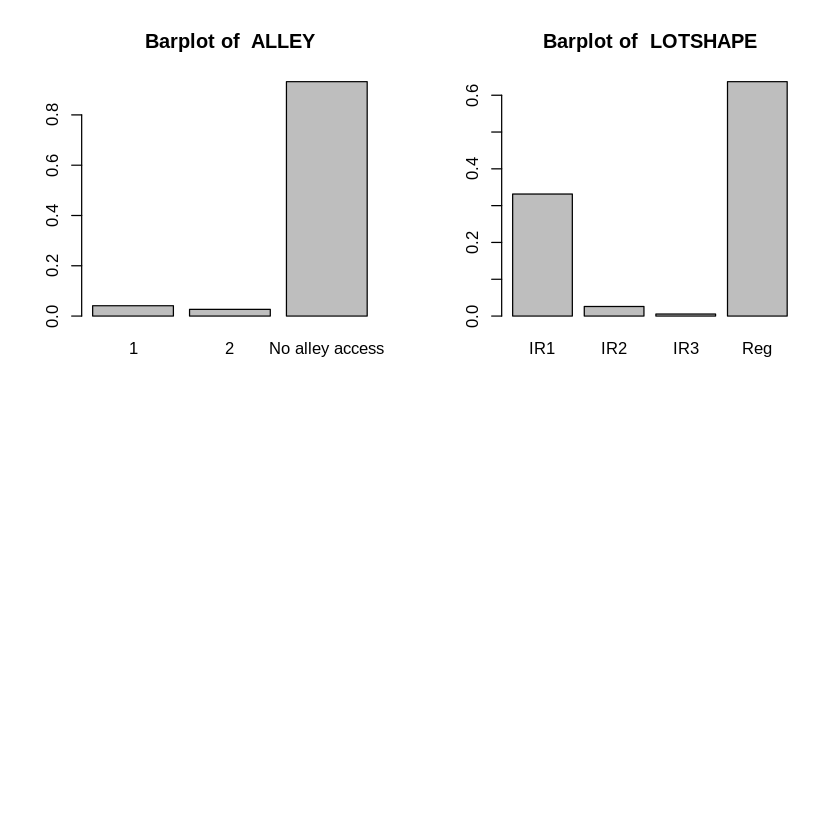

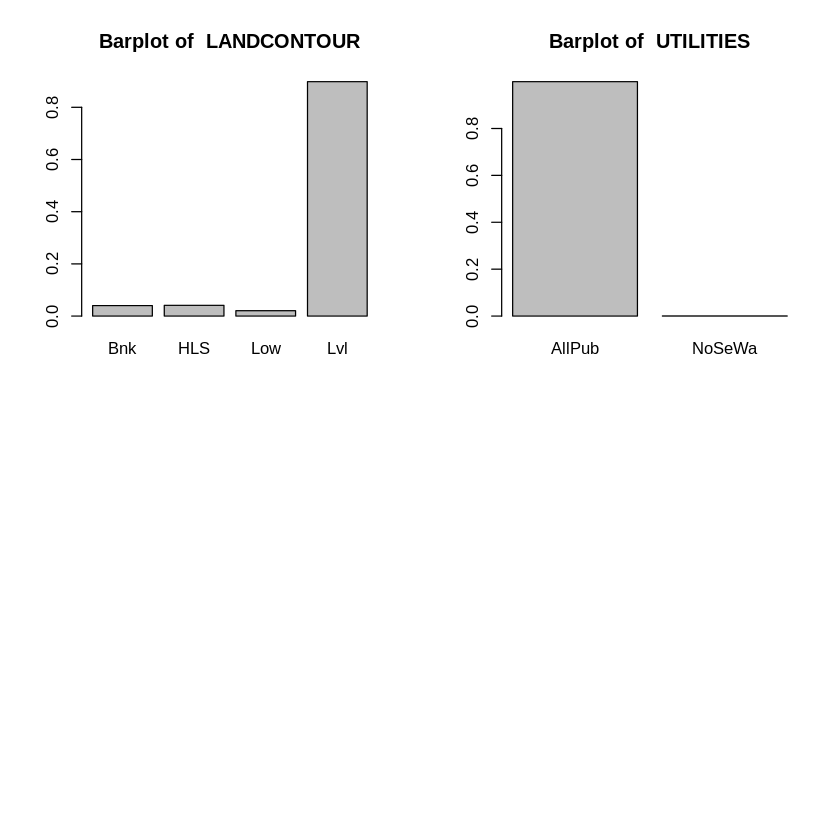

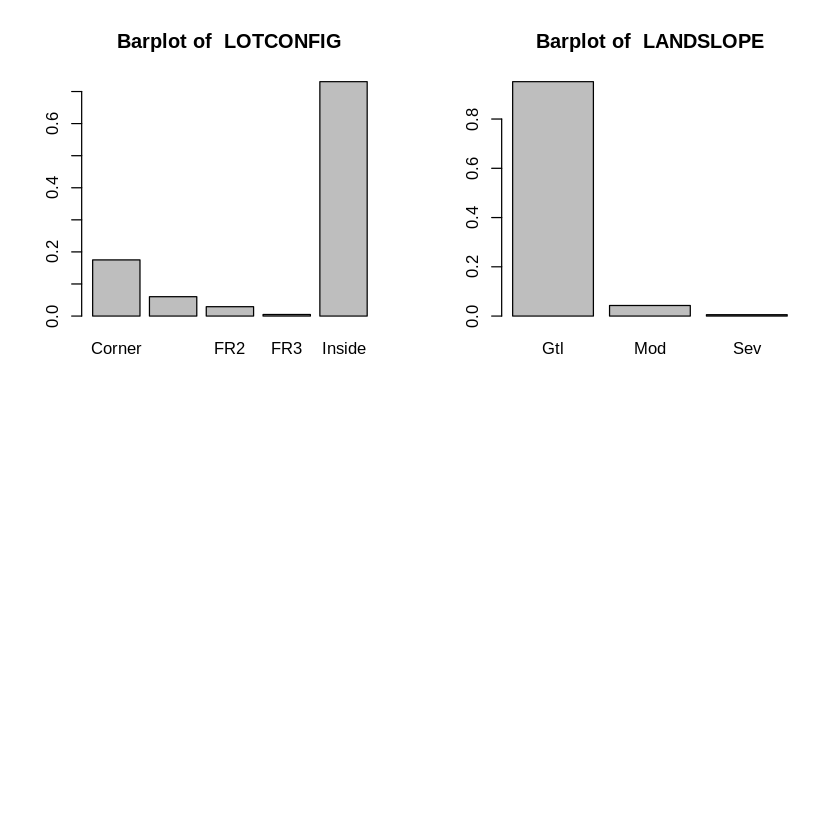

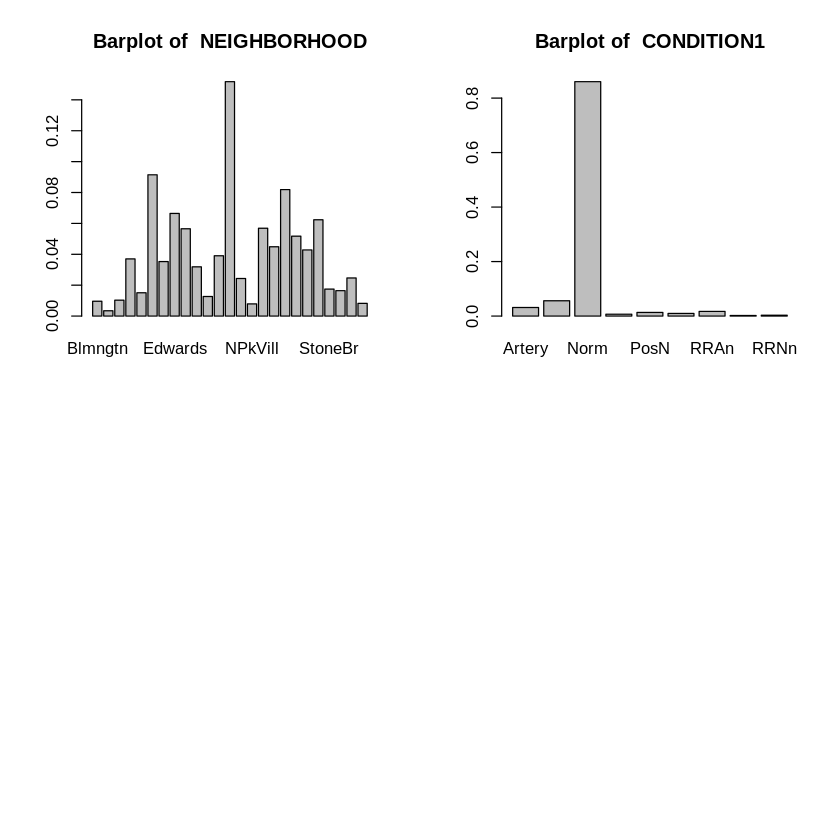

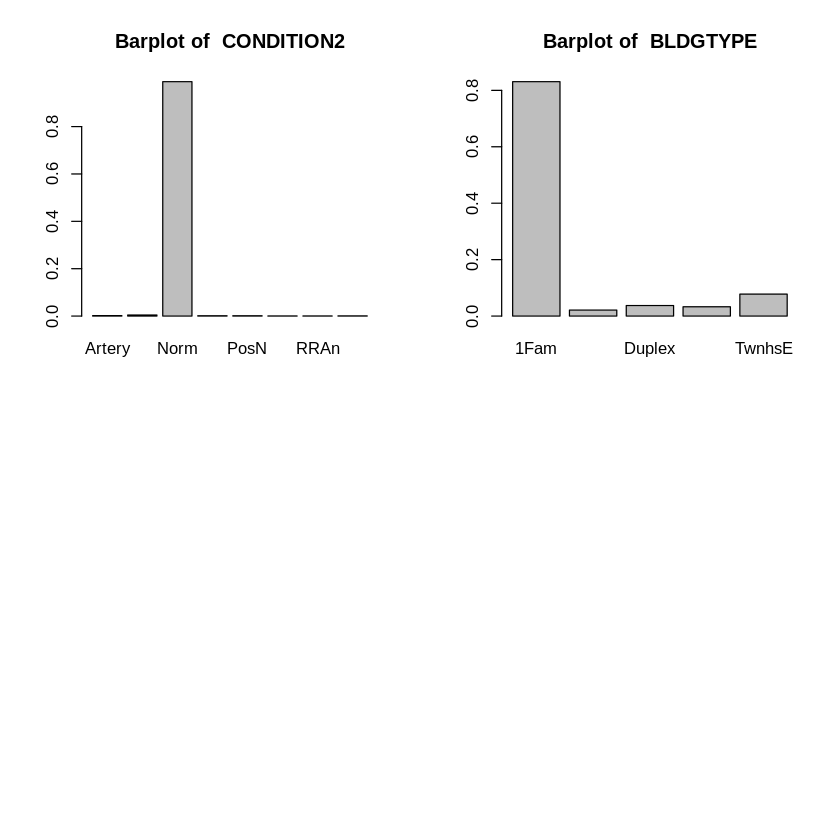

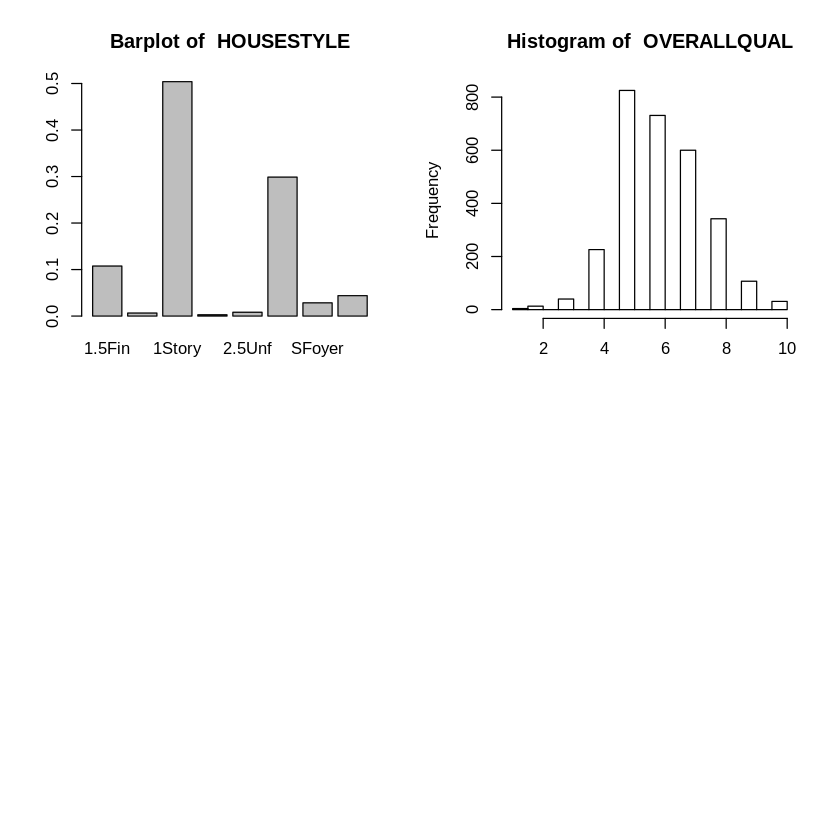

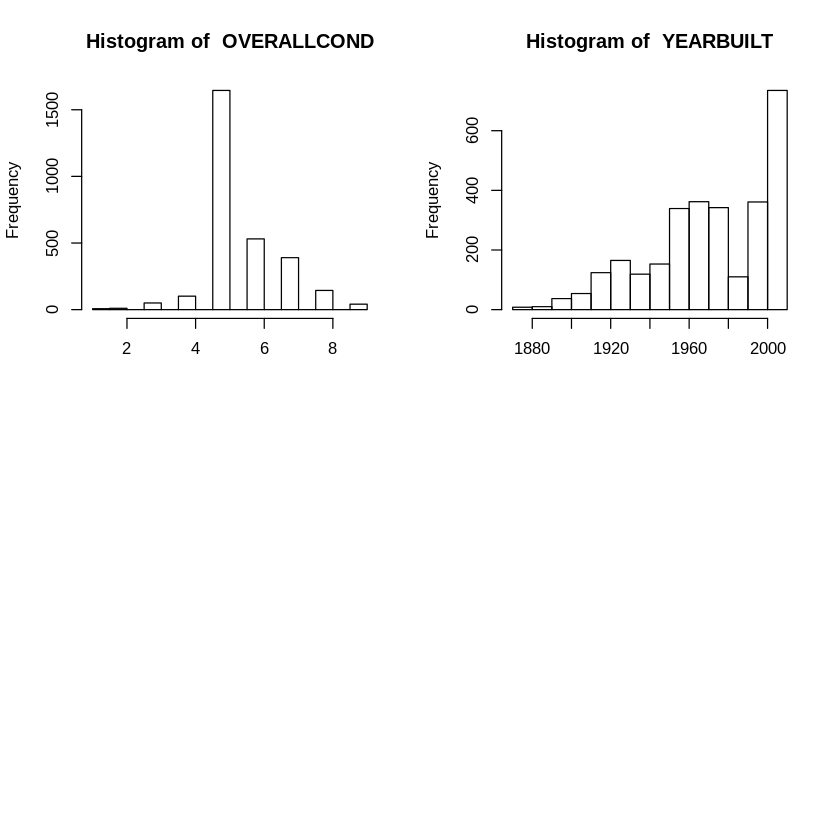

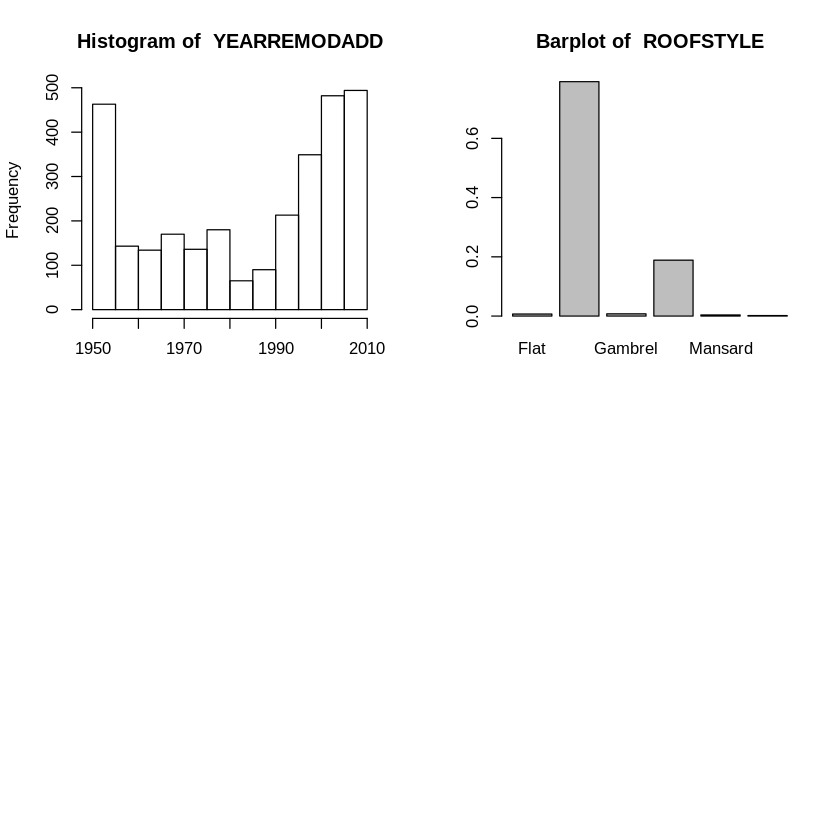

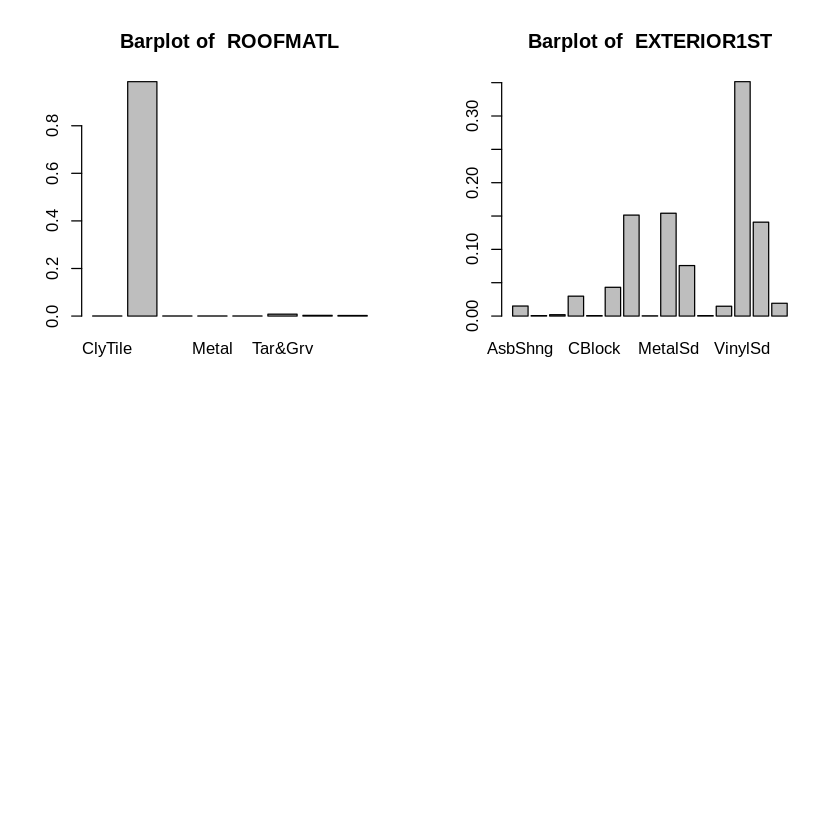

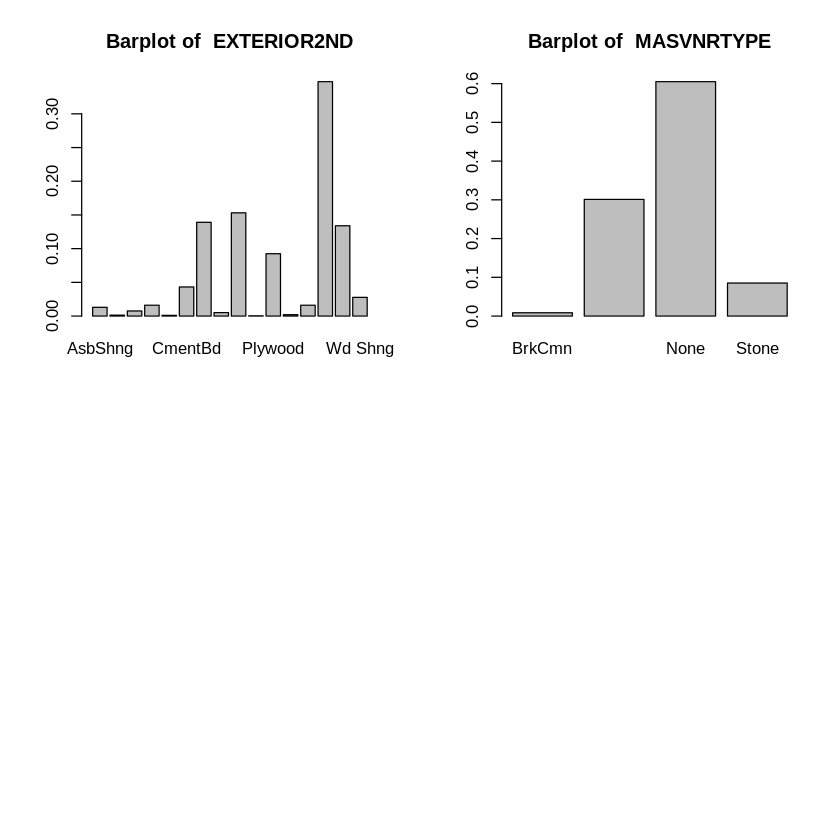

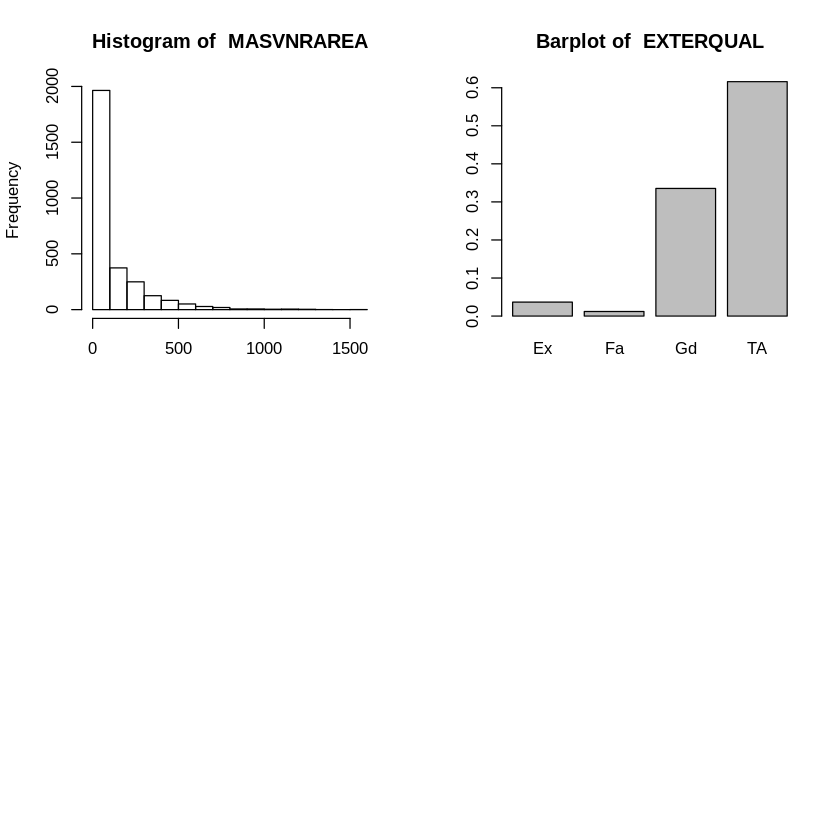

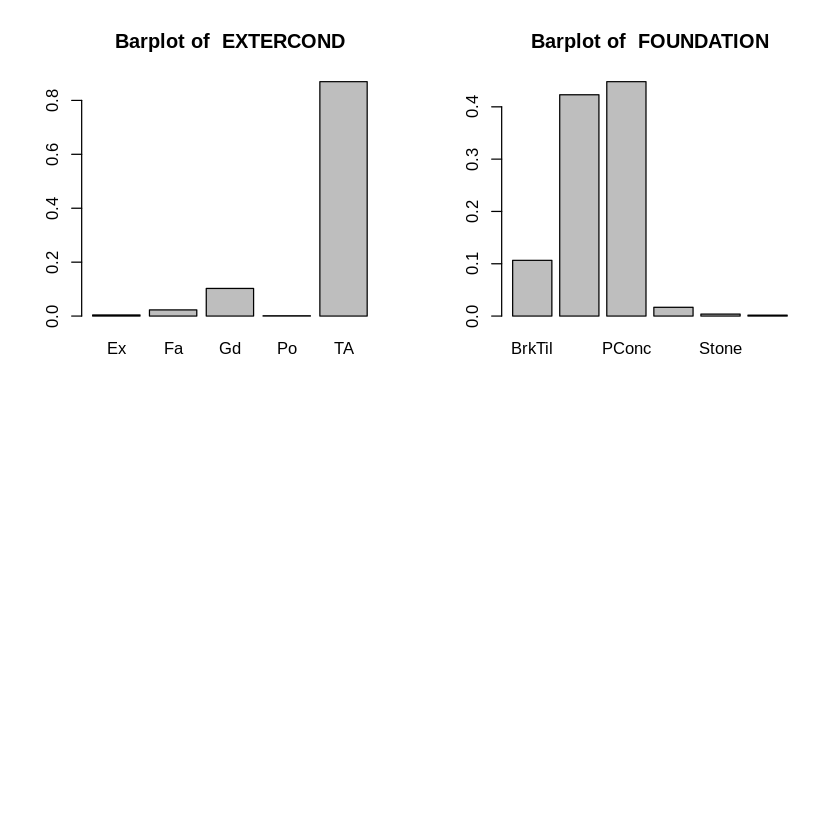

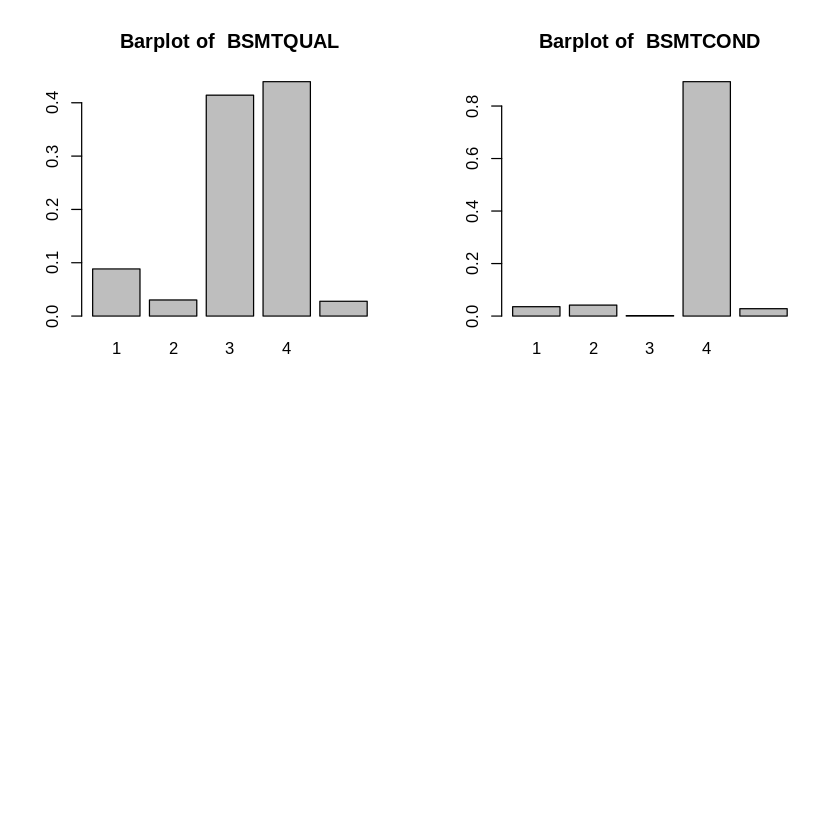

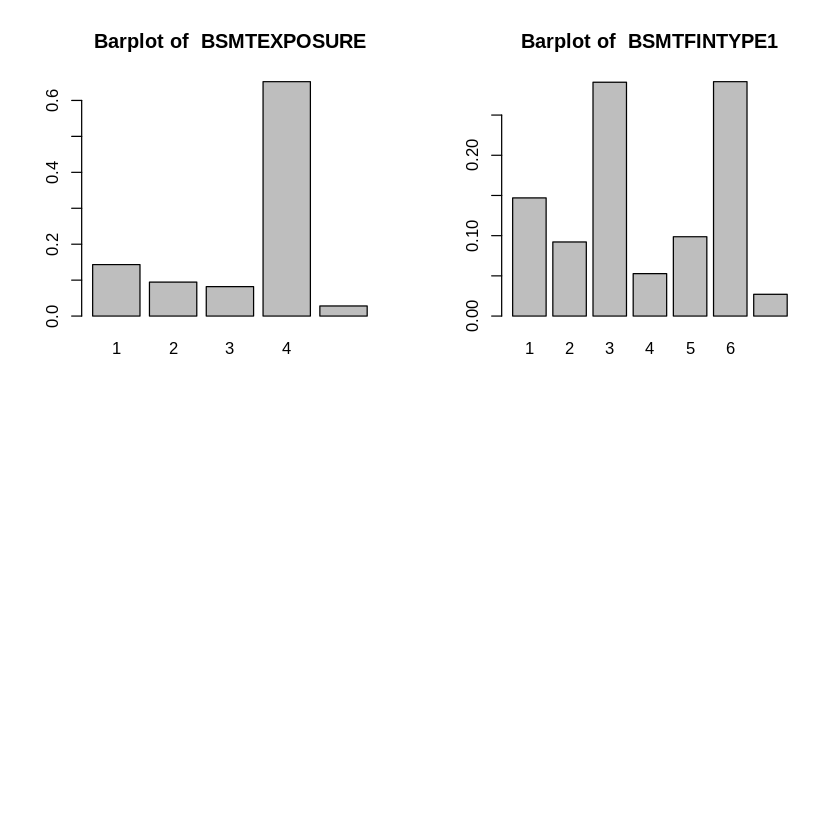

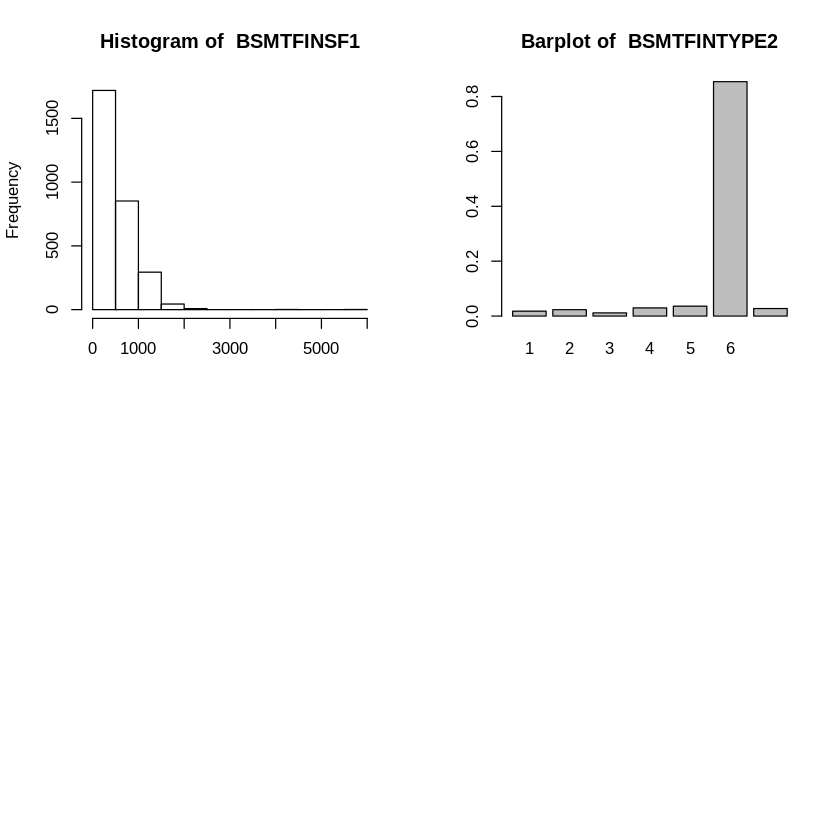

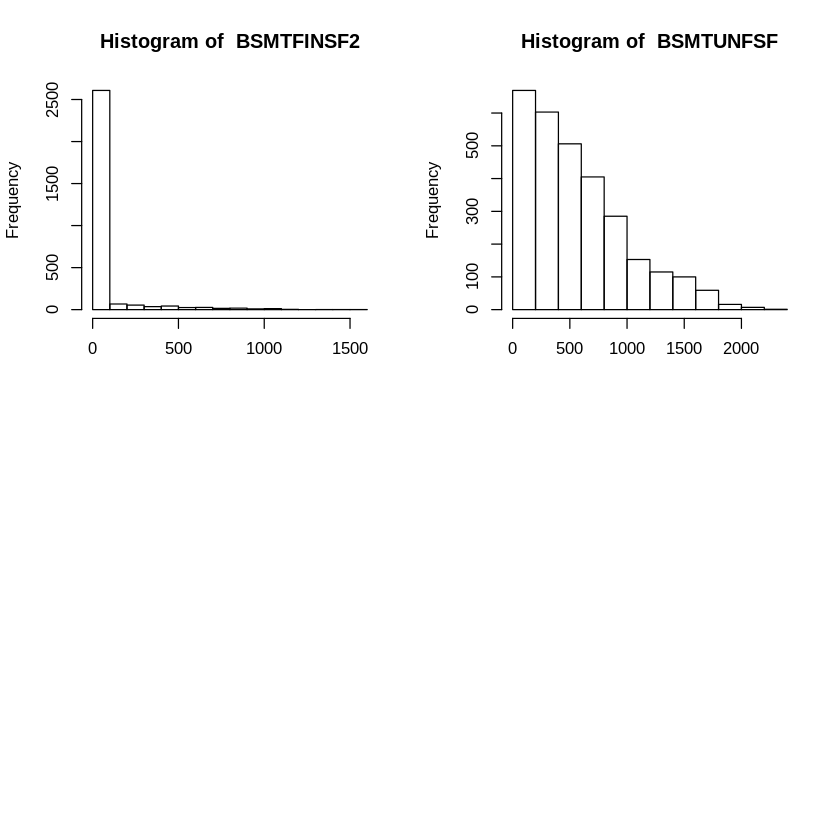

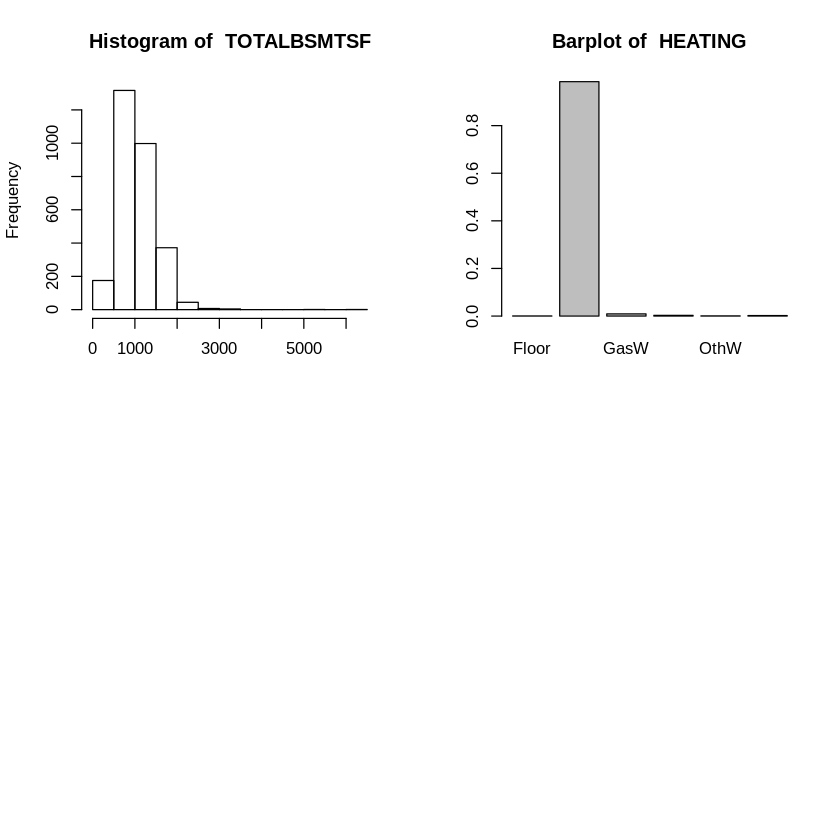

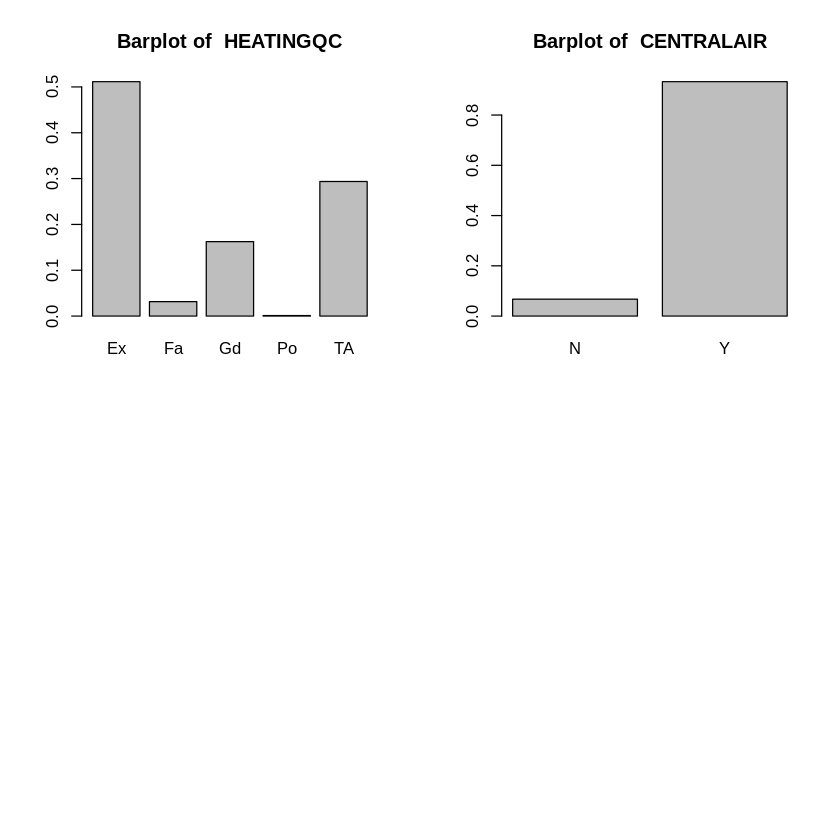

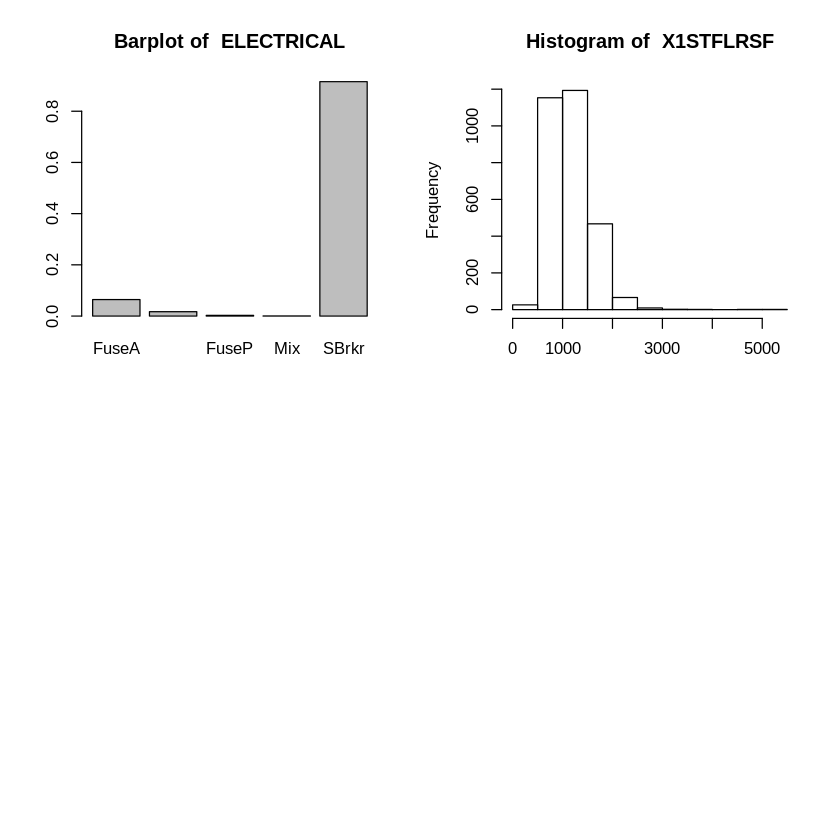

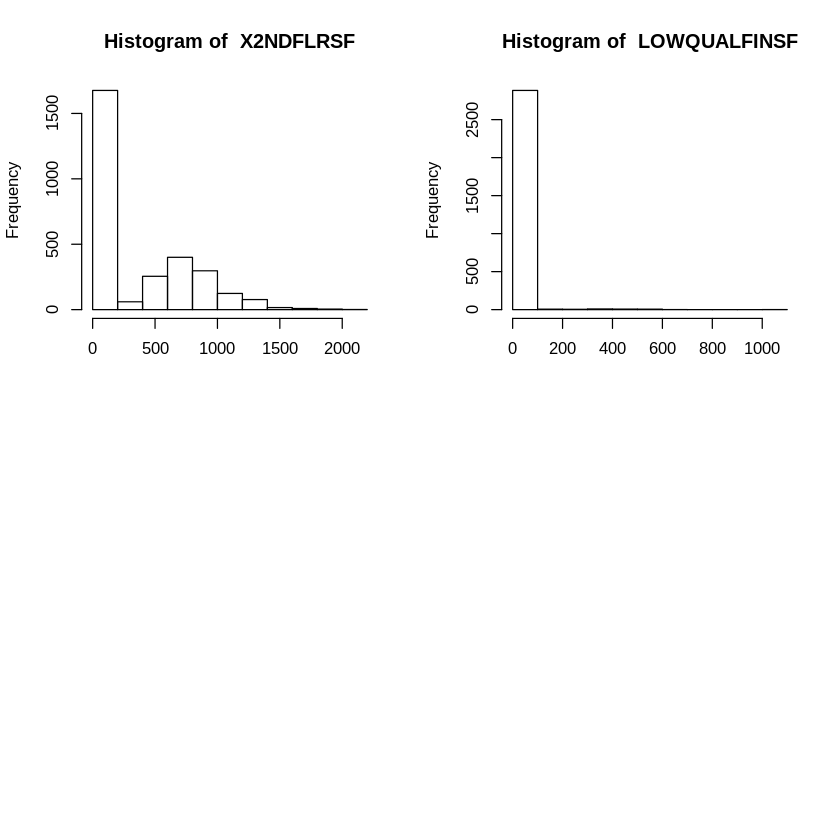

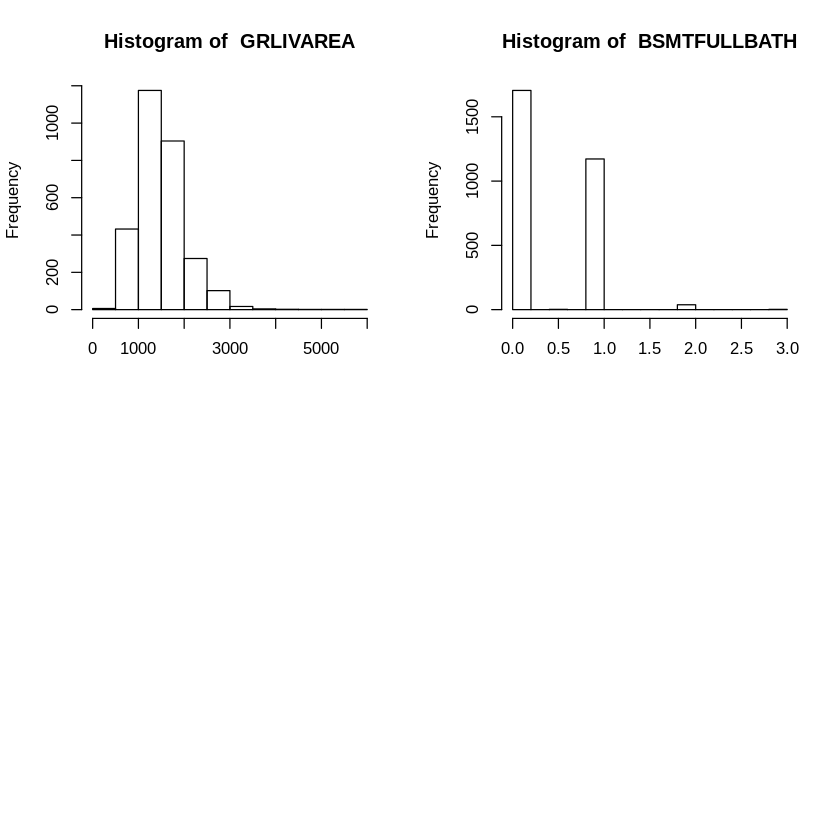

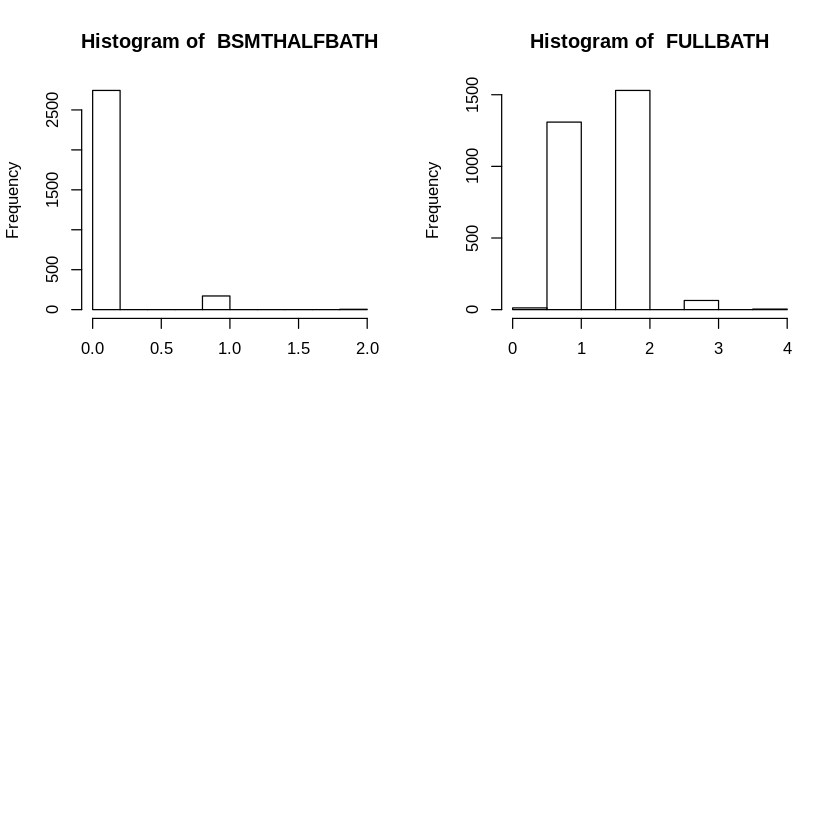

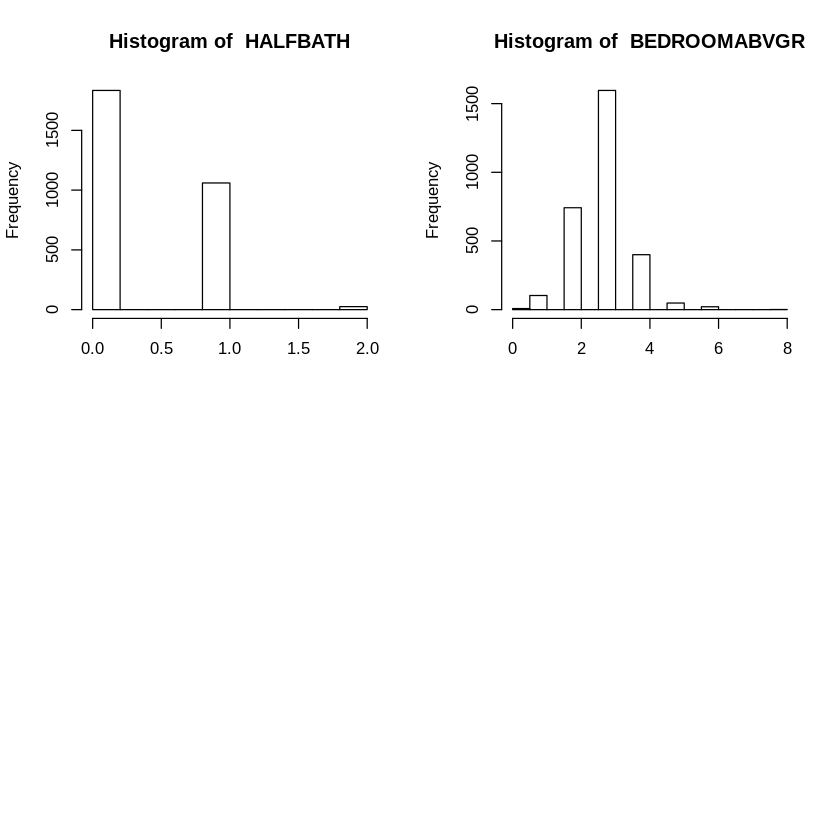

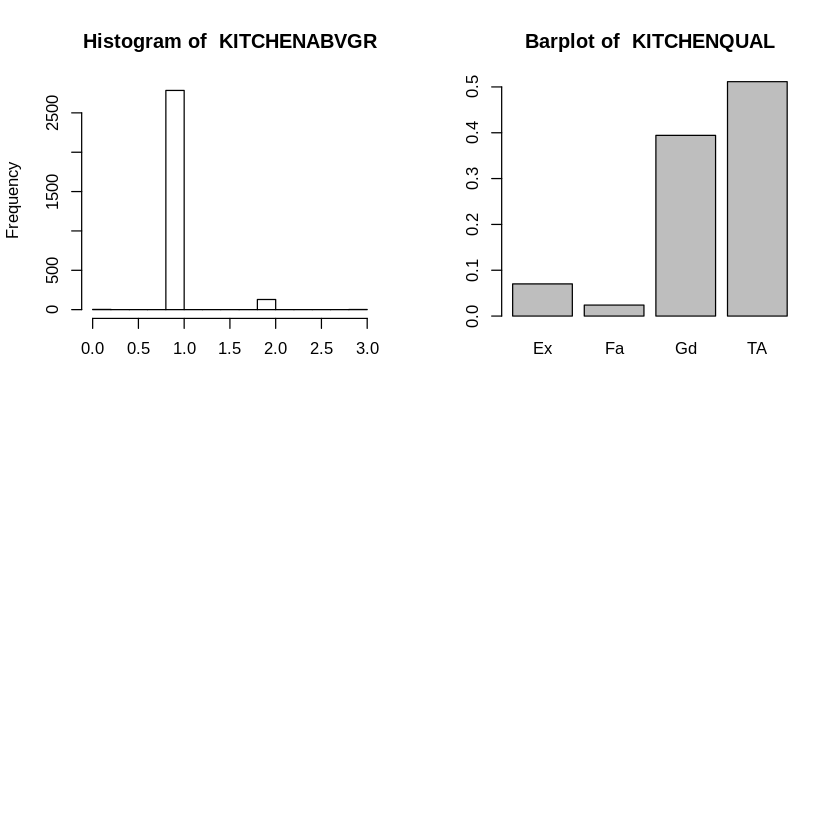

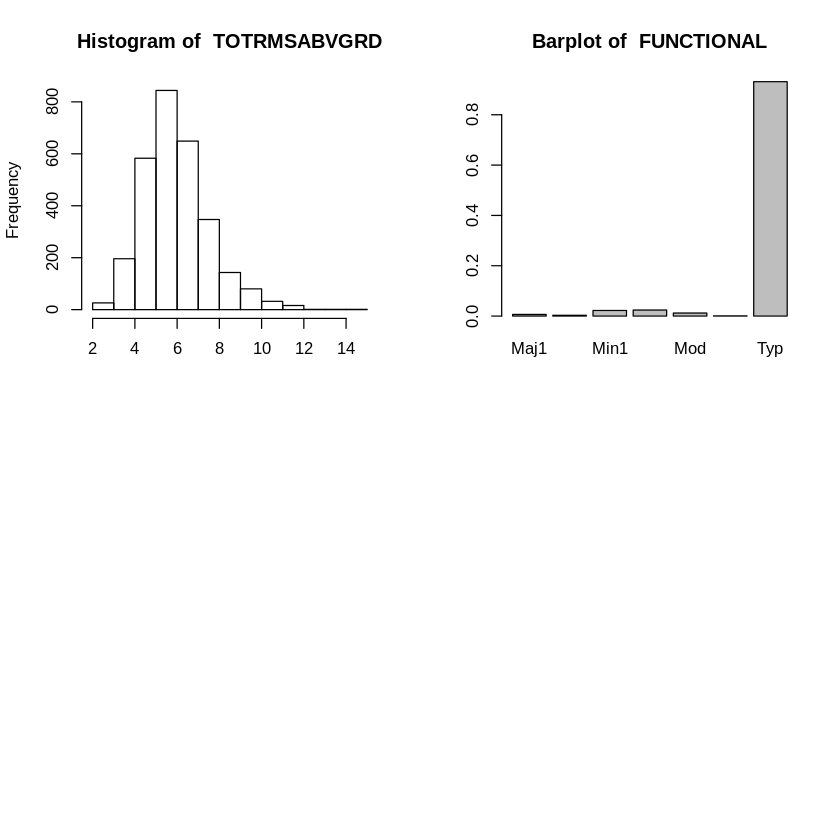

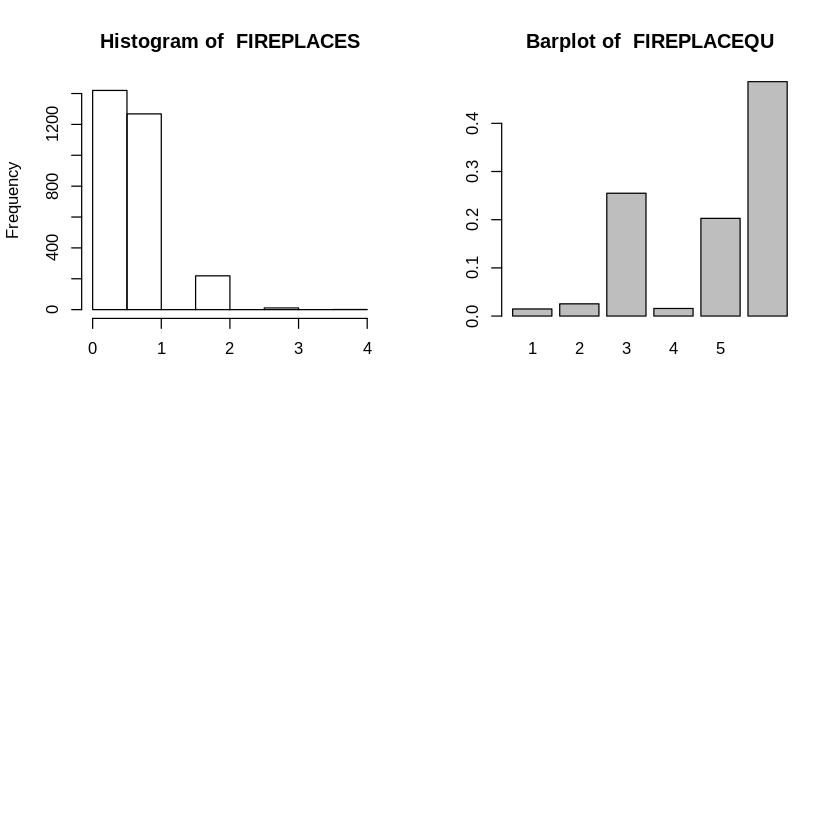

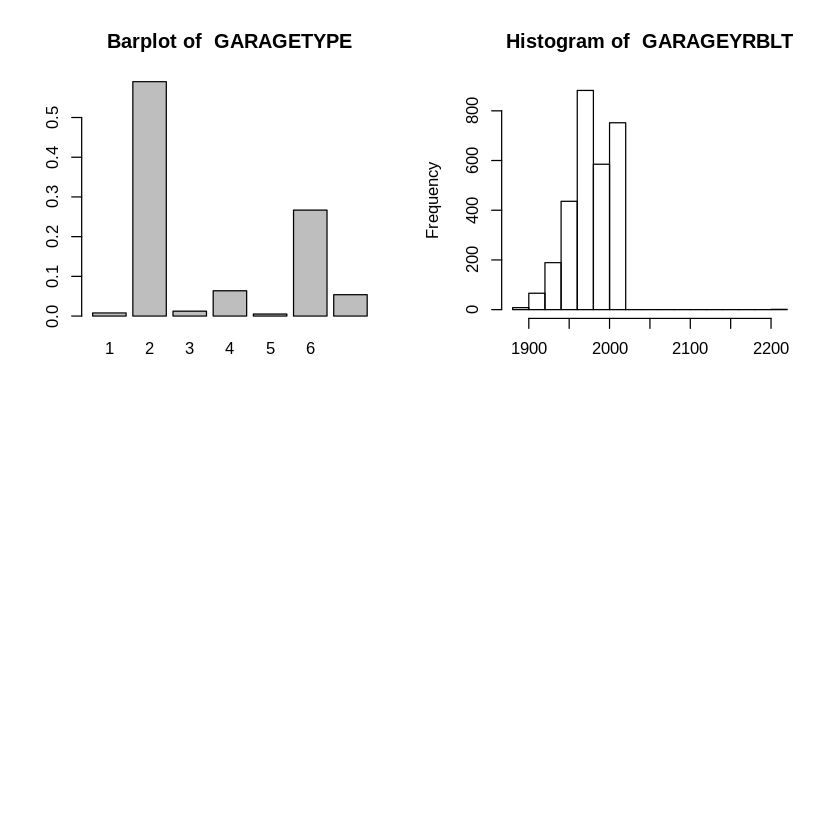

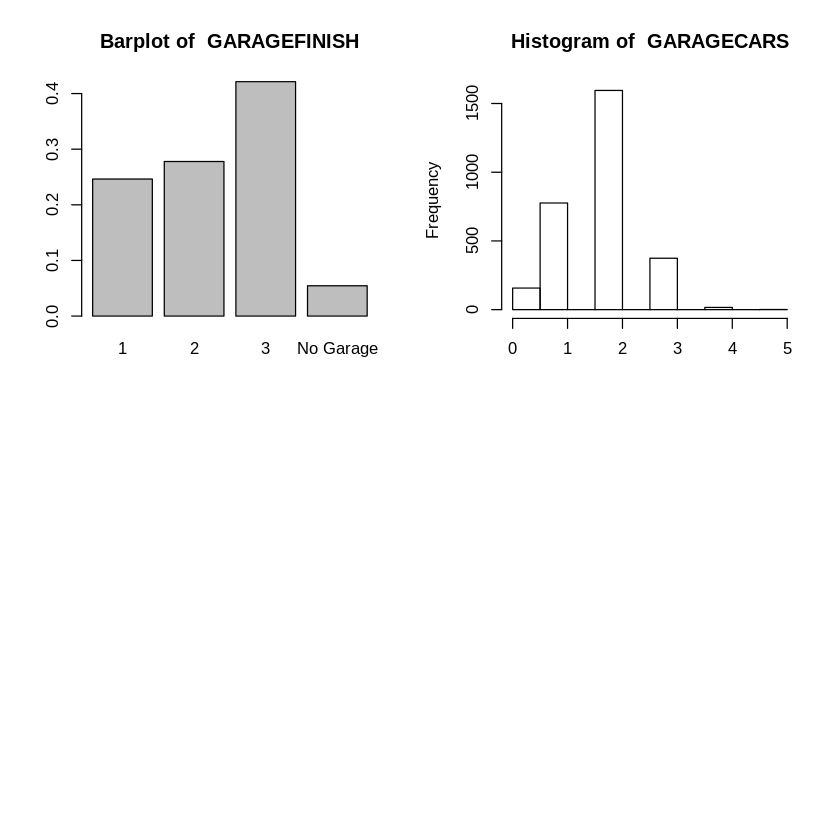

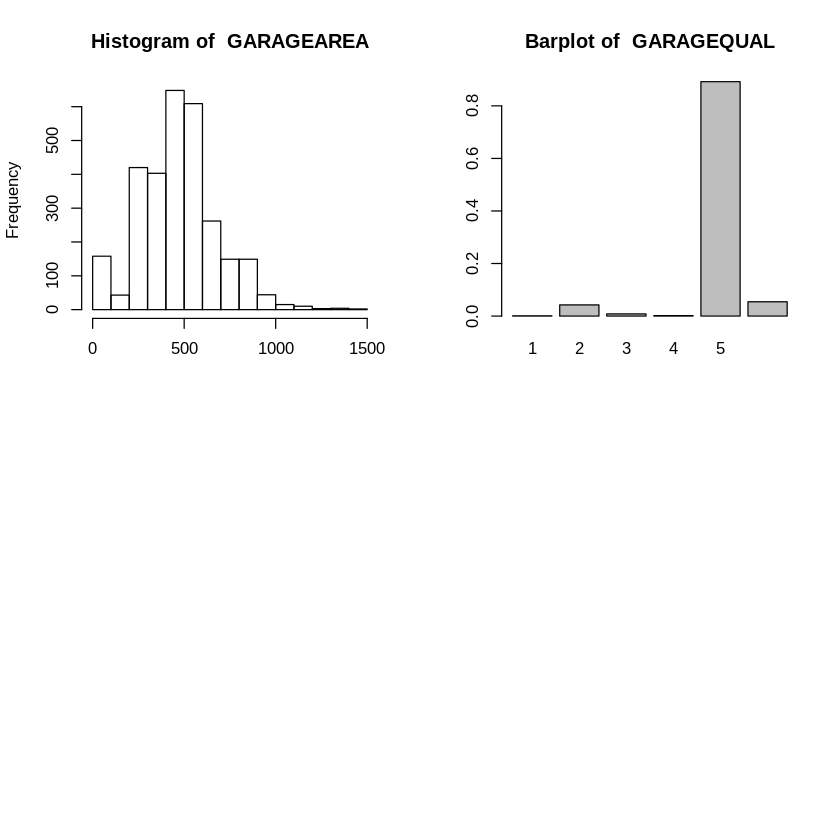

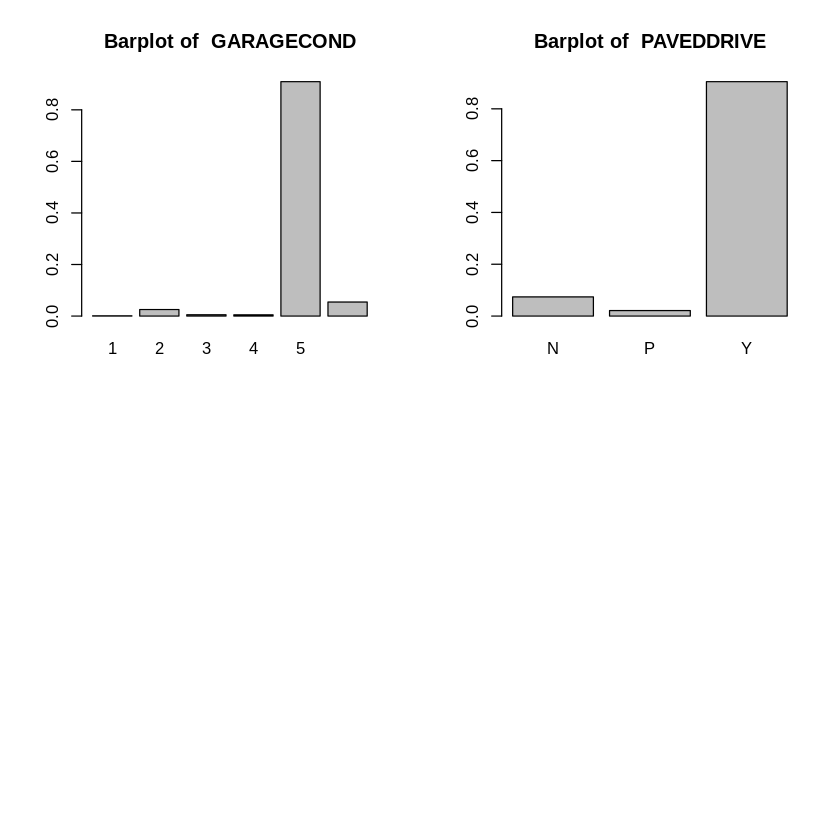

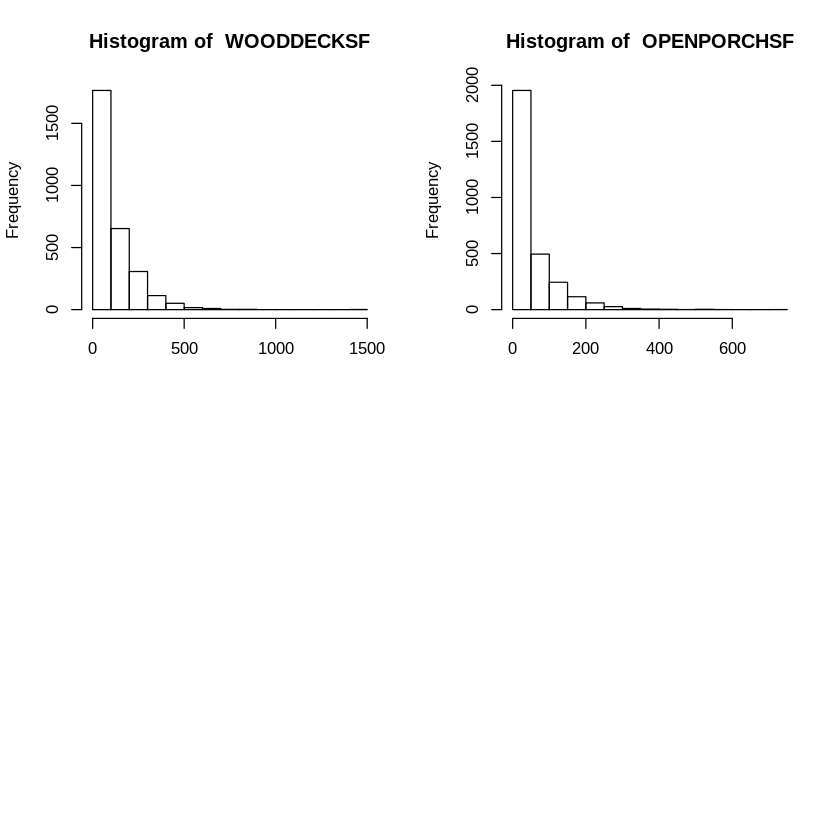

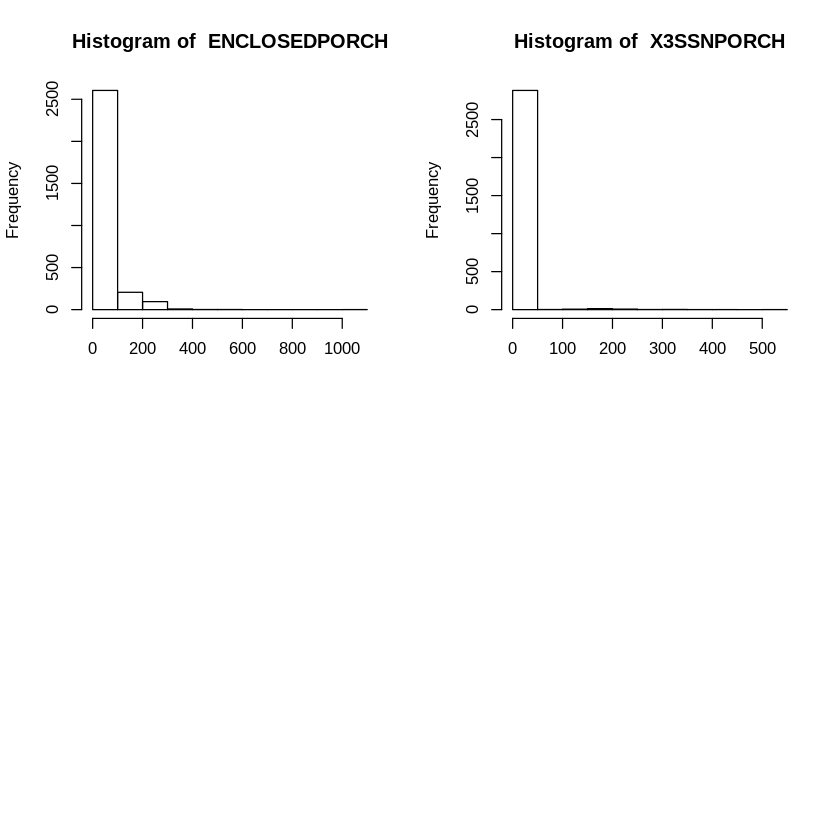

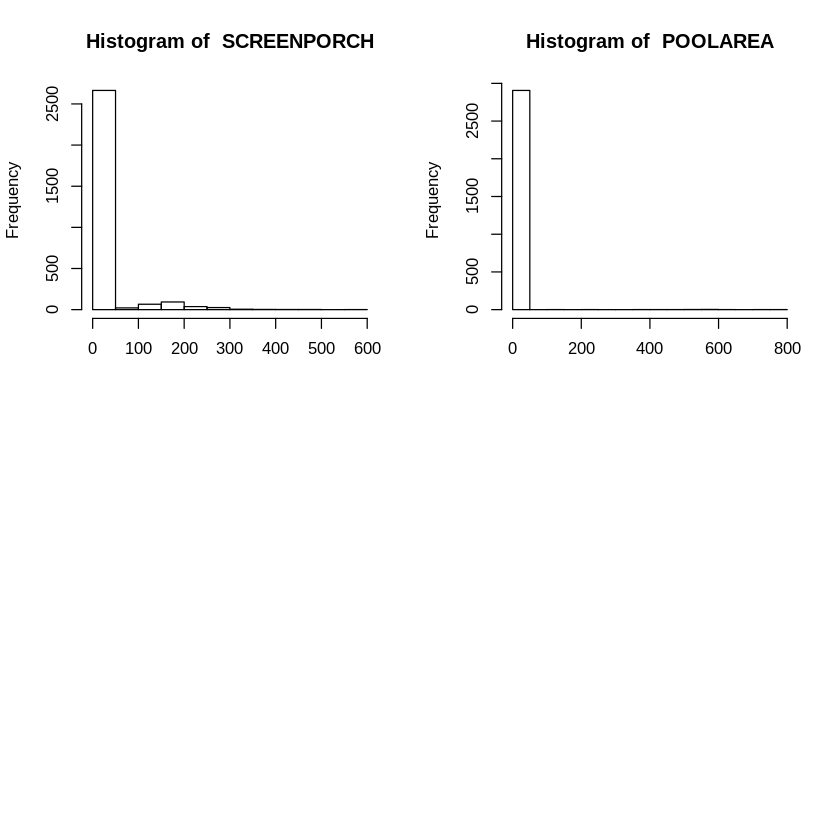

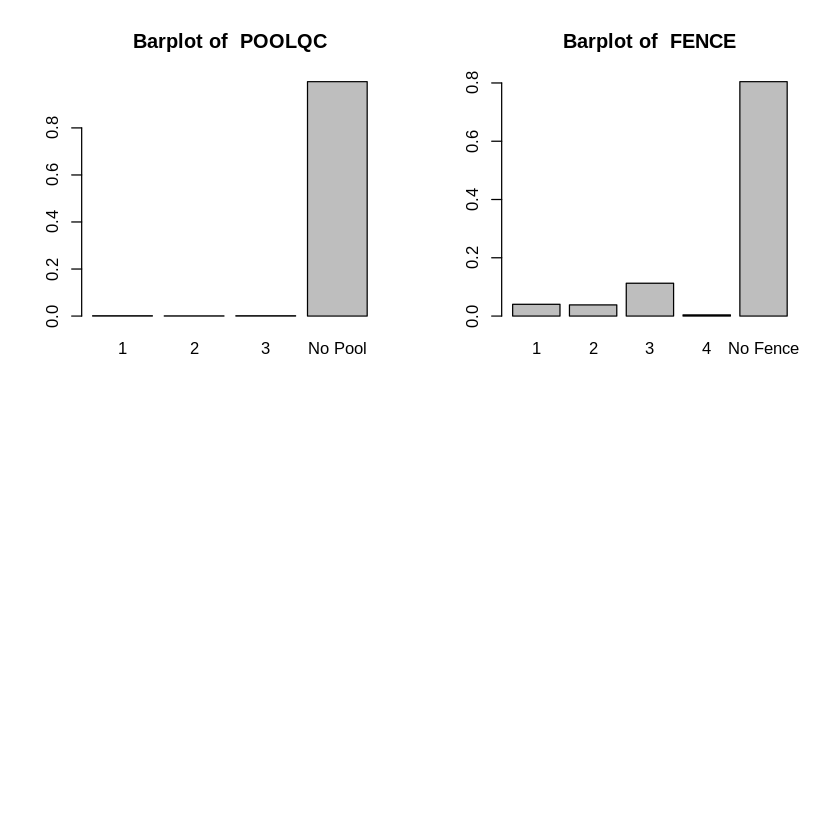

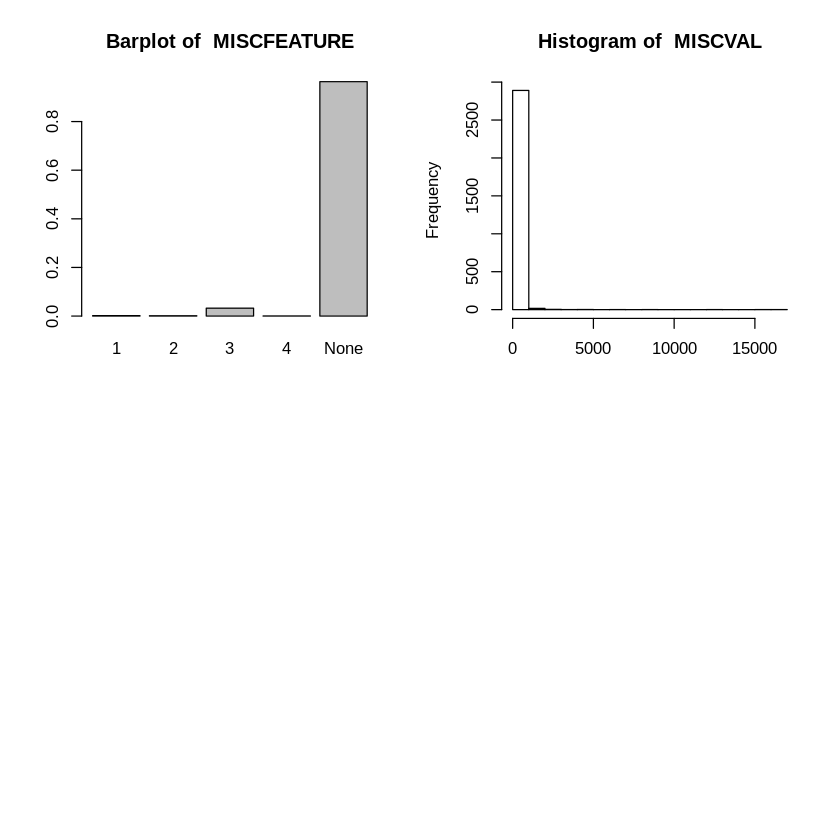

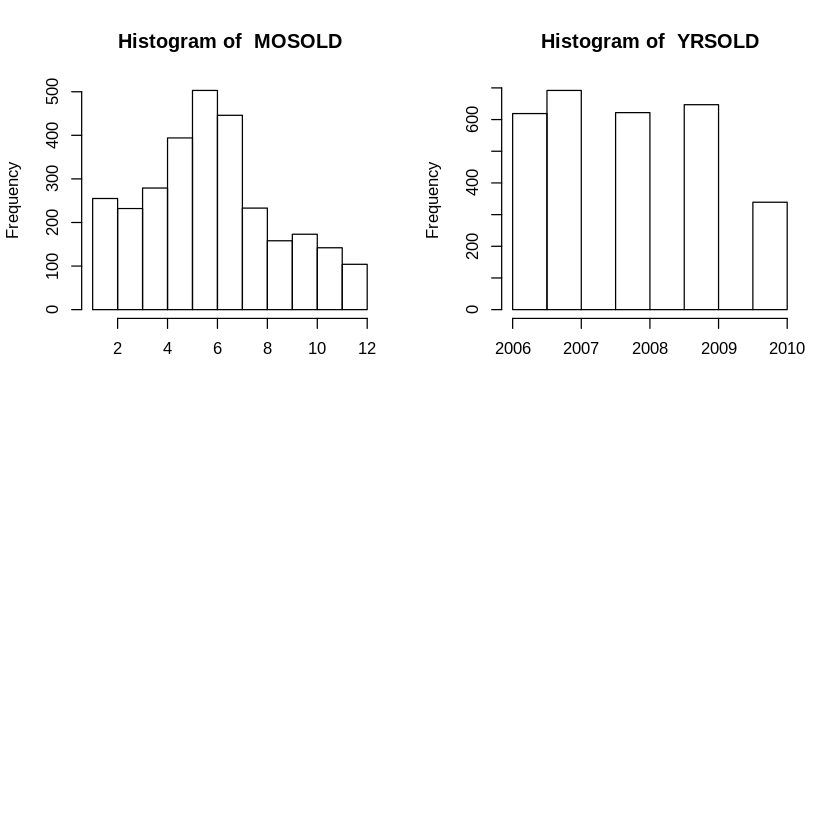

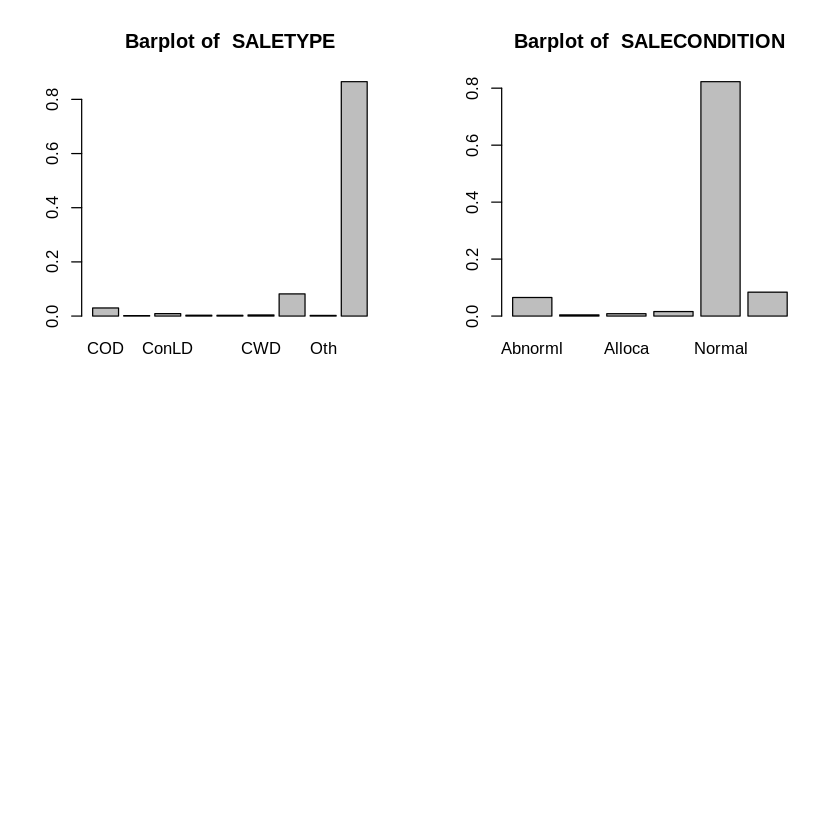

In [10]:
# Now we visulize each 
for (i in seq(1,ncol(al)-1,2)){
    par(mfrow=c(2, 2))
    desc(names(al[i]))
    desc(names(al[i+1]))
}

In [11]:
a <- data.frame(sapply(al, class))
names(a) <- c("class")
a

,class
Id,integer
MSSubClass,integer
MSZoning,factor
LotFrontage,numeric
LotArea,integer
Street,factor
Alley,character
LotShape,factor
LandContour,factor
Utilities,factor


In [12]:
a %>%
    group_by(class) %>% 
    tally()

class,n
character,15
factor,29
integer,26
numeric,11


In [63]:
data <- al[al$train_or_test == 'train',]
data <- data[ , -which(names(data) == 'train_or_test')]
data <- merge(data, train_target, by = 'Id')

# test <- al[al$train_or_test == 'test',]
# test <- test[ , -which(names(test) == 'train_or_test')]
library(caTools)
sample <- sample.split(data$SalePrice, SplitRatio = 0.75) 
train <- subset(data, sample == TRUE)
test <- subset(data, sample == FALSE)

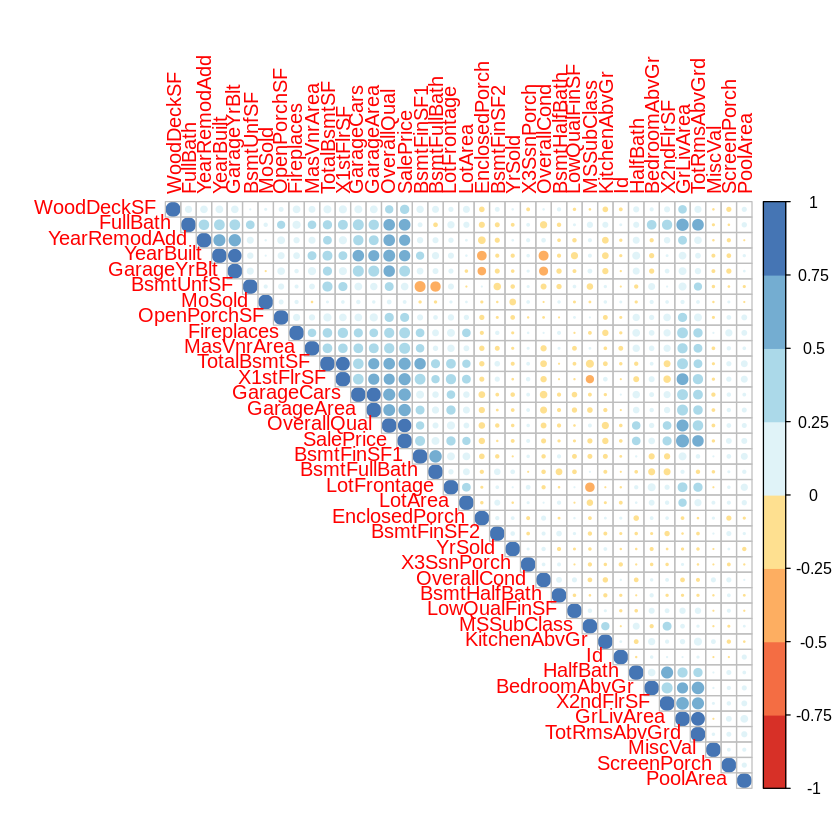

In [64]:
corrplot(cor(train %>% keep(is.numeric)), type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

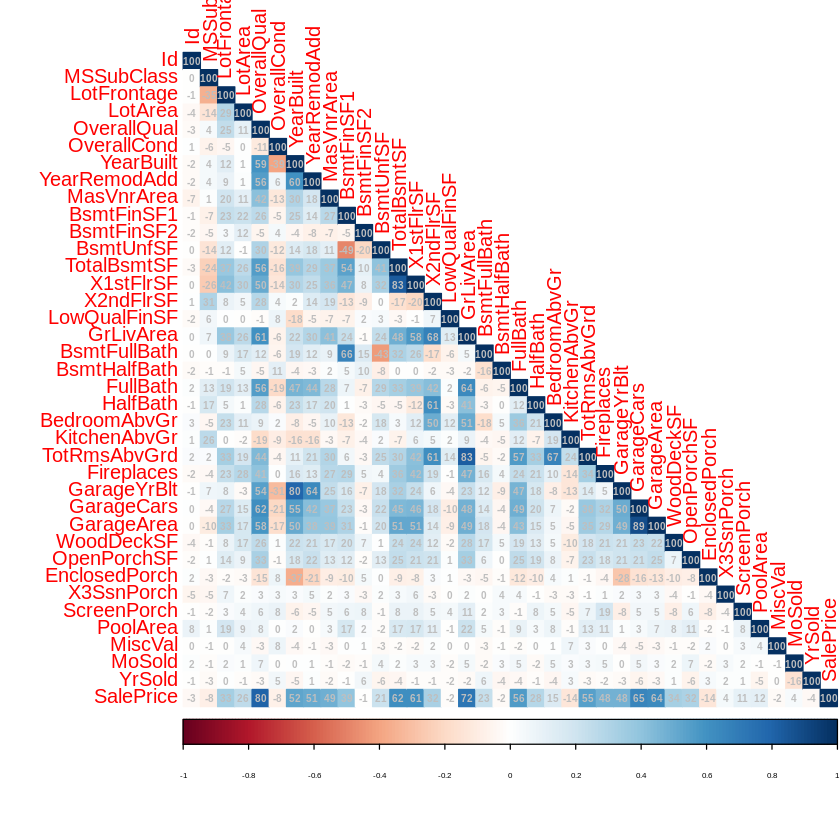

In [65]:
cex.before <- par("cex")
par(cex = 0.5)
corrplot(cor(train %>% keep(is.numeric)), insig = "blank", method = "color",
    addCoef.col="grey", type='lower',
    tl.cex = 1/par("cex"), addCoefasPercent = TRUE)
par(cex = cex.before)

In [66]:
# check if case to lower reduce number of unique values
for (i in names(train %>% keep(is.factor))){
    a = table(train[[i]])
    b = table(tolower(train[[i]]))
    if (!all(a==b)){
        print(i)
    }
    
}

In [67]:
lm1 <- lm(SalePrice ~ ., data=train)
names(which.min(summary(lm1)$coefficients[,4]))

[1] "RoofMatlWdShngl"

In [68]:
a = data.frame(summary(lm1)$coefficients)
a[order(a$Pr...t..),]

,Estimate,Std..Error,t.value,Pr...t..
RoofMatlWdShngl,6.968847e+05,5.005444e+04,13.922534,2.642806e-40
RoofMatlCompShg,6.272470e+05,4.908275e+04,12.779378,1.125098e-34
RoofMatlTar&Grv,6.328868e+05,5.235260e+04,12.088928,1.937856e-31
RoofMatlWdShake,6.203797e+05,5.232845e+04,11.855495,2.249272e-30
RoofMatlMembran,7.121073e+05,6.168493e+04,11.544266,5.595310e-29
RoofMatlMetal,6.765083e+05,6.068582e+04,11.147717,3.061991e-27
RoofMatlRoll,6.144729e+05,5.543846e+04,11.083875,5.775015e-27
X2ndFlrSF,6.261473e+01,6.371317e+00,9.827596,8.565762e-22
PoolArea,4.103053e+02,4.954229e+01,8.281921,3.992728e-16
Condition2PosN,-2.406262e+05,2.929121e+04,-8.214964,6.739115e-16


In [69]:
# Automated variable selection
fit <- lm(formula = SalePrice ~ ., data = train) 
automate_variable_selection <- stepAIC(fit, direction="both")

Start:  AIC=24711
SalePrice ~ Id + MSSubClass + MSZoning + LotFrontage + LotArea + 
    Street + Alley + LotShape + LandContour + Utilities + LotConfig + 
    LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + 
    HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + 
    RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + 
    MasVnrArea + ExterQual + ExterCond + Foundation + BsmtQual + 
    BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + 
    BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + 
    CentralAir + Electrical + X1stFlrSF + X2ndFlrSF + LowQualFinSF + 
    GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + 
    BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + 
    Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + 
    GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + 
    PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + X3SsnPorch + 
    Scr

In [74]:
only_significat_vars <- names(automate_variable_selection$contrasts)

In [75]:
final_df <- train[only_significat_vars]
dim(final_df)

[1] 1221   23

In [76]:
lm3 <- lm(SalePrice ~ ., data= cbind(final_df, train["SalePrice"]))
summary(lm3)


Call:
lm(formula = SalePrice ~ ., data = cbind(final_df, train["SalePrice"]))

Residuals:
    Min      1Q  Median      3Q     Max 
-121659  -21129    -674   16617  209306 

Coefficients: (3 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              197742.1    89018.1   2.221 0.026530 *  
MSZoningFV                43767.0    20166.4   2.170 0.030199 *  
MSZoningRH                60102.0    20238.7   2.970 0.003046 ** 
MSZoningRL                67052.1    17142.7   3.911 9.74e-05 ***
MSZoningRM                39766.9    16073.3   2.474 0.013508 *  
StreetPave                 8354.8    18693.3   0.447 0.655005    
LandContourHLS             1479.9     8662.4   0.171 0.864381    
LandContourLow            -4034.0    10685.4  -0.378 0.705855    
LandContourLvl             2662.9     6351.9   0.419 0.675133    
UtilitiesNoSeWa          -53475.6    40028.4  -1.336 0.181846    
LotConfigCulDSac          14965.4     5589.3 

In [77]:
pred <- predict(lm3, newdata = test)

Warning message in predict.lm(lm3, newdata = test):
“prediction from a rank-deficient fit may be misleading”

In [97]:
average_inherit_error <- (mean(test$SalePrice)^2)
MSE_LM <- sum((test$SalePrice - pred)^2)/nrow(test)

In [91]:
write.csv(cbind('Id'=test$Id, 'SalePrice'=pred), "submission_Linear_regression.csv", row.names=FALSE)

# <center><font color='red' size='10'>Random forest</font>

In [360]:
library(ranger)
rf1 <- ranger( 
            formula   = SalePrice ~ .,  
            data      = train, 
            num.trees = 1000,  
            num.threads = 100,  
            min.node.size = 2, 
            classification = F,
            mtry = floor(sqrt(ncol(train)))) 
pred_rf1 <- predict(rf1, test)
MSE_RF <- (sum(test$SalePrice - pred_rf1$predictions)^2)/nrow(test)
print(paste("MSE_LM: ", MSE_LM/100000000))
print(paste("MSE_RF: ", MSE_RF/100000000))

[1] "MSE_LM:  13.1204141502268"
[1] "MSE_RF:  43.639021822547"


In [358]:
# as we see here, Liner regression have very low MSE compaired to MSE obtained from Random forest model

In [362]:
scaled.dat <- scale(train %>% keep(is.numeric))

In [370]:
train[names(data.frame(scaled.dat))] = 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1,1,60,65.0000,8450,7,5,2003,2003,196,706,⋯,0,61,0,0,0,0,0,2,2008,208500
2,2,20,80.0000,9600,6,8,1976,1976,0,978,⋯,298,0,0,0,0,0,0,5,2007,181500
3,3,60,68.0000,11250,7,5,2001,2002,162,486,⋯,0,42,0,0,0,0,0,9,2008,223500
5,5,60,84.0000,14260,8,5,2000,2000,350,655,⋯,192,84,0,0,0,0,0,12,2008,250000
6,6,50,85.0000,14115,5,5,1993,1995,0,732,⋯,40,30,0,320,0,0,700,10,2009,143000
7,7,20,75.0000,10084,8,5,2004,2005,186,1369,⋯,255,57,0,0,0,0,0,8,2007,307000
8,8,60,69.3058,10382,7,6,1973,1973,240,859,⋯,235,204,228,0,0,0,350,11,2009,200000
10,10,190,50.0000,7420,5,6,1939,1950,0,851,⋯,0,4,0,0,0,0,0,1,2008,118000
11,11,20,70.0000,11200,5,5,1965,1965,0,906,⋯,0,0,0,0,0,0,0,2,2008,129500
12,12,60,85.0000,11924,9,5,2005,2006,286,998,⋯,147,21,0,0,0,0,0,7,2006,345000
